In [35]:
import cv2
import numpy as np
import time
import base64
import requests
import json
import numpy as np
import matplotlib.pyplot as plt

[
  7, 
  2, 
  0, 
  6, 
  4
]



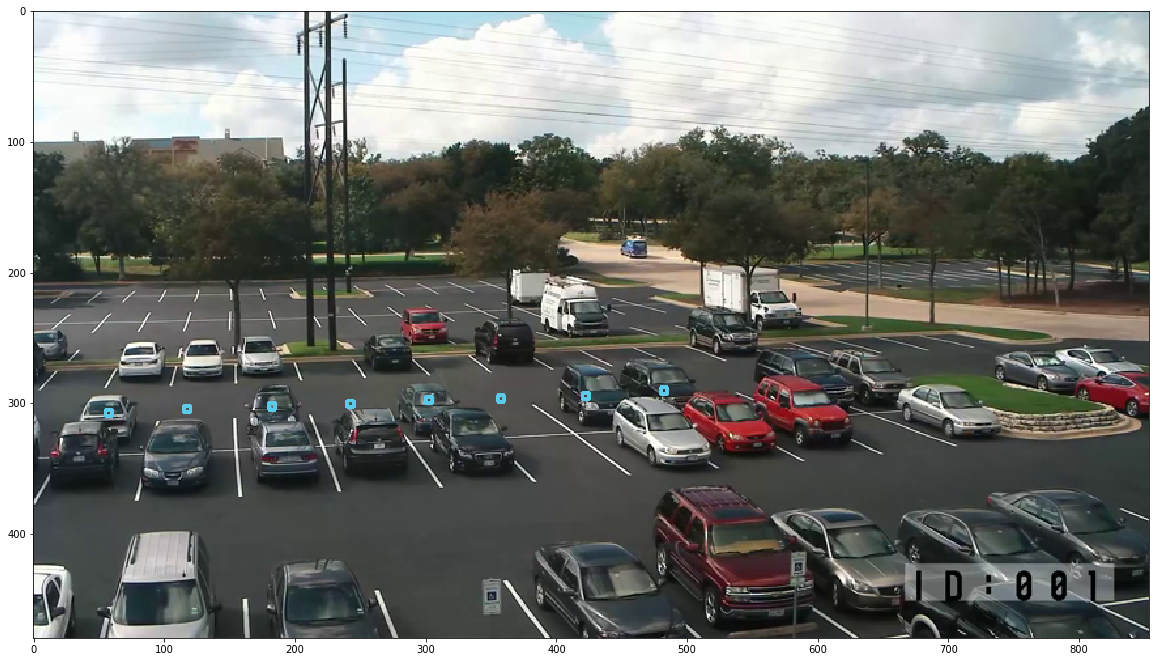

In [61]:
cap = cv2.VideoCapture('videos/parking.mp4')
url = "http://0.0.0.0:5000/api/v1/places/get_places"
 
if (cap.isOpened()== False): 
  print("Error opening video stream or file")
 
start = time.time()
i = 0
while(cap.isOpened()):
    ret, frame = cap.read()
#     print(type(frame))
    if ret == True: 
        if time.time() - start >= 0.4:
            start = time.time()
            _, img_encoded = cv2.imencode('.jpg', frame)
            
            files = {'image': frame}
            headers = {
                'content-type': "image/jpeg"
            }

            response = requests.request("POST", url, data=img_encoded.tostring(),  headers=headers)
            print(response.text)
        
            coordinates = [
                [  55, 305],
                [ 115, 302],
                [ 180, 300],
                [ 240, 298],
                [ 300, 295],
                [ 355, 294],
                [ 420, 292],
                [ 480, 288],

                [ 100, 730],
                [ 240, 730],
                [ 400, 725],
                [ 550, 720],
                [ 685, 720],
                [ 840, 715],
                [1000, 695],
            ]
            (w, h) = (5,5)

            for j in range(len(coordinates)):
                (x, y) = (coordinates[j][0], coordinates[j][1])
                color = [234, 203, 92]
                cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)
                text = "space"
            plt.figure(figsize=(20,40))
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            plt.imshow(frame)
#             cv2.imwrite("output/frame" + str(i) + ".jpg", frame)
            i += 1
            break

    else: 
        break

cap.release()